<a href="https://colab.research.google.com/github/nika-va/Pokemon-dataset-analysis/blob/main/Pokemon_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  


<div align="center">
  <h1> <p align="center">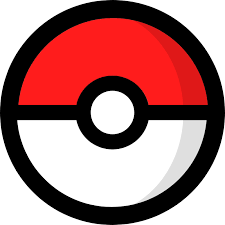</p> Pokemon dataset analysis</h1>
</div>

### ⚡**About data:**
<hr>


This Dataset contains data from all Pokemons and their forms from the six generations. It includes their number, name, primary and secondary type, abilities, base stats vs other types, etc.


>Columns :

* Number: Number of the Pokemon in the National Pokedex
* Name: Name of the Pokemon
* Type 1: Primary Type of the Pokemon
* Type 2: Secondary Type of the Pokemon
* Abilities: A list that contains the abilities of the Pokemon
* HP: Base Hit Points stat of the Pokemon
* Att: Base Attack stat of the Pokemon
* Def: Base Defense stat of the Pokemon
* Sp. Atk: Base Special Attack stat of the Pokemon
* Sp. Def: Base Special Defense stat of the Pokemon
* Speed: Base Speed stat of the Pokemon
* Generation: The Generation in which the Pokemon was introduced
* Legendary: Denotes if the Pokemon is Legendary




>







### ⚡**Dataset is imported from:**
<hr>

https://www.kaggle.com/code/buseyarentekin/data-sciencetutorial-for-beginners-from-datai-team/input?select=pokemon.csv

### ⚡**Content table:**
<hr>


1.   [Load and Check data](#1)
  *   [Convert date columns](#1.1)
1.   [Familiarize with data](#2)
  *   [Variable description](#2.1)
  *   [Feature frequency](#2.2)
  *   [Drop repetitive data](#2.3)
1. [Dealing with missing data](#3)
1. [Outlier detection](#4)
1. [Visualization](#5)
1. [Feature Engineering](#6)
1. [Encoding categorical data](#7)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

<a name="1"></a>
#1. Load and Check data


In [ ]:
pokemon_df = pd.read_csv('/content/pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


<a name="2"></a>
#2. Familiarize with data


In [ ]:
print(len(pokemon_df), "\n", pokemon_df.dtypes)

800 
 #              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [ ]:
pokemon_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
pokemon_df['#'].is_unique

True

In [ ]:
pokemon_df['Name'].is_unique

True

In [ ]:
categorical_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']
numerical_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

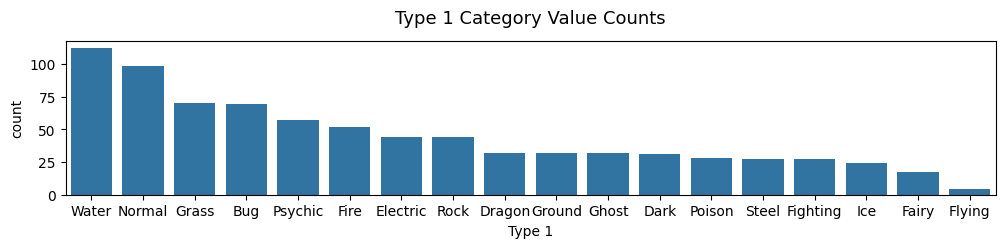

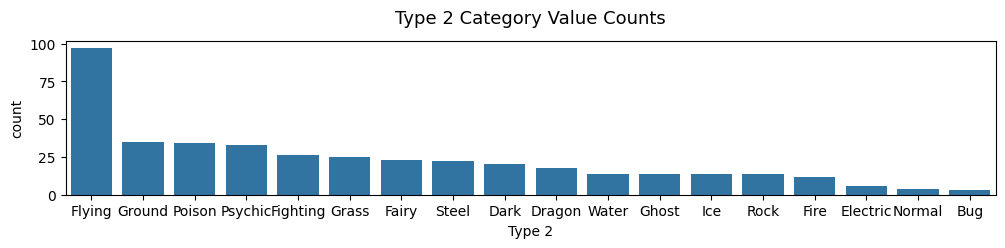

In [ ]:
plt.figure(figsize=(12,2))
sns.countplot(pokemon_df, x='Type 1', order=pokemon_df['Type 1'].value_counts().index);
plt.title('Type 1 Category Value Counts', y=1.06, fontsize = 13)
plt.show()
plt.figure(figsize=(12,2))
plt.title('Type 2 Category Value Counts', y=1.06, fontsize = 13)
sns.countplot(pokemon_df, x='Type 2', order=pokemon_df['Type 2'].value_counts().index);

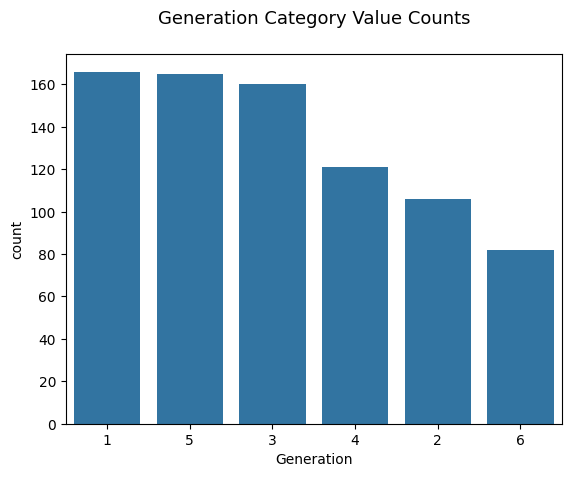

In [ ]:
# plt.figure(figsize=(12,2))
sns.countplot(pokemon_df, x='Generation', order=pokemon_df['Generation'].value_counts().index)
plt.title('Generation Category Value Counts', y=1.06, fontsize = 13)
plt.show()

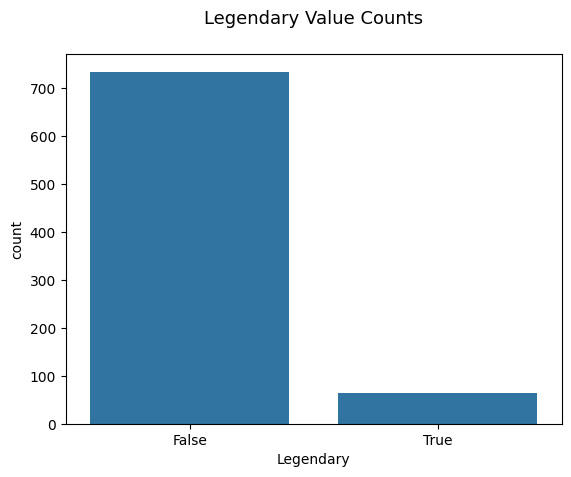

In [ ]:
# plt.figure(figsize=(12,2))
sns.countplot(pokemon_df, x='Legendary')
plt.title('Legendary Value Counts', y=1.06, fontsize = 13)
plt.show()

In [ ]:
def hist_plot(cols):
  for col in cols:
    plt.figure(figsize=(6,3))
    plt.hist(pokemon_df[col], bins=25)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"{col} distribution")
    plt.show()

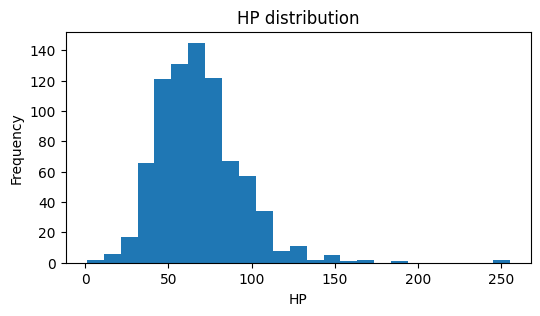

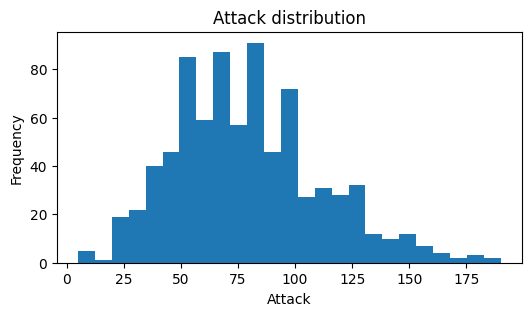

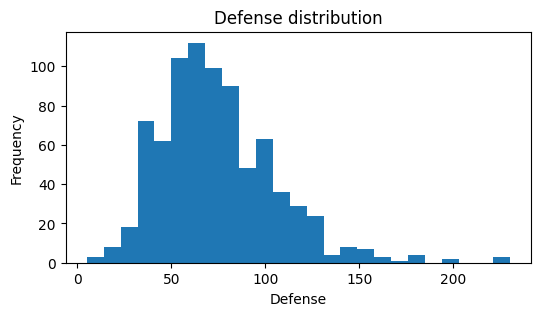

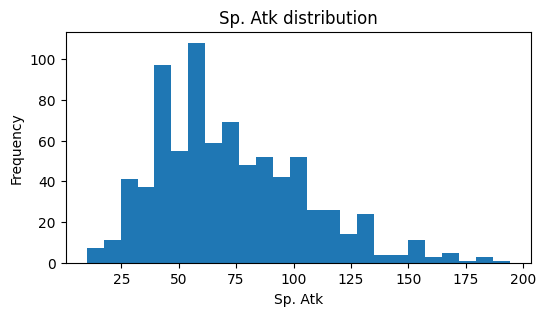

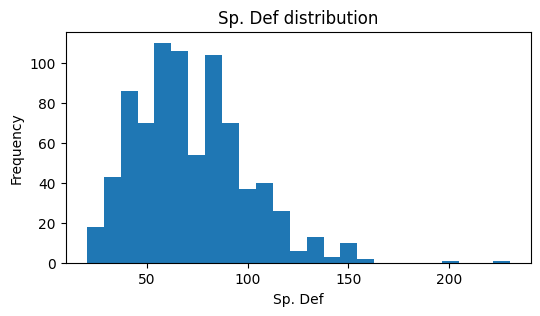

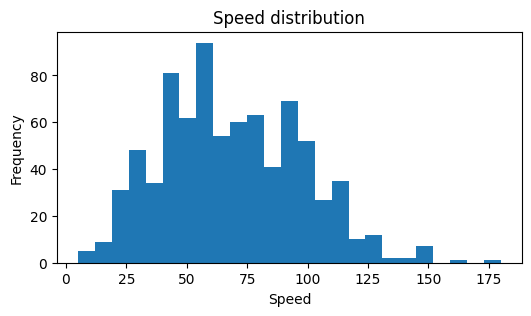

In [ ]:
hist_plot(numerical_cols)

<a name='3'></a>
#3. Dealing with missing data

In [ ]:
for col in pokemon_df:
  missing = pokemon_df[col].isnull().sum()
  if missing:
    print(f"{col}: missing {missing}, {round(missing/len(pokemon_df),2)}%")

Name: missing 1, 0.0%
Type 2: missing 386, 0.48%


In [ ]:
pokemon_df.dropna(subset=['Name'], inplace=True)

**Replacement of Type 2 Column:**

In [ ]:
df = pokemon_df.groupby(by='Type 1')[numerical_cols].mean()
df

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,70.038462,96.461538,66.153846,52.846154,64.500000,64.961538
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


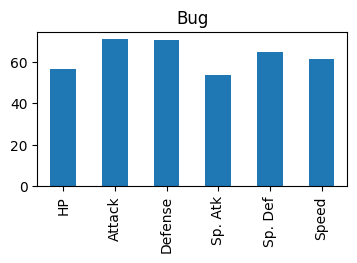

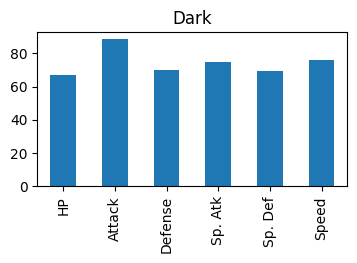

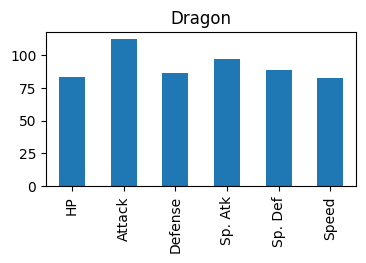

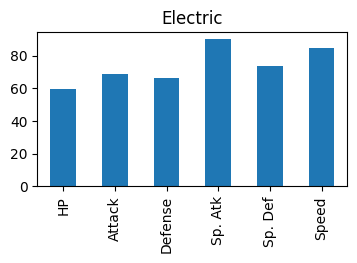

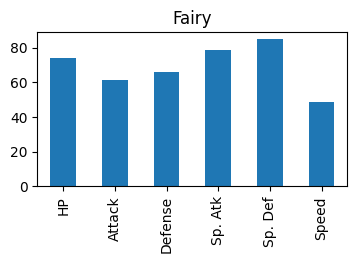

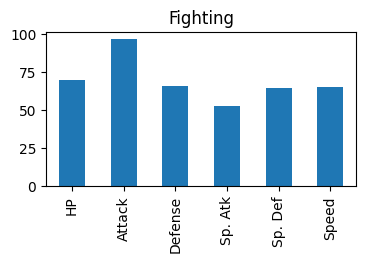

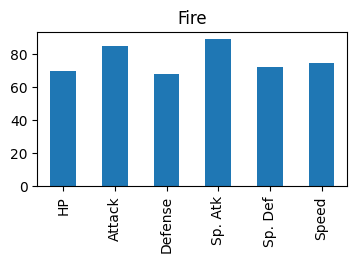

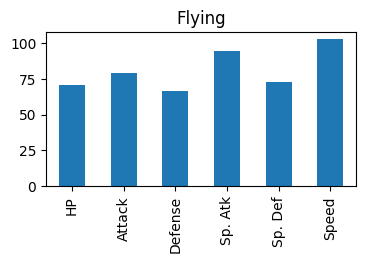

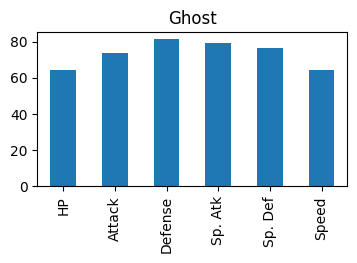

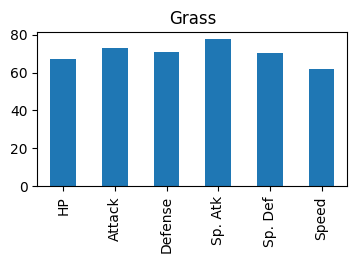

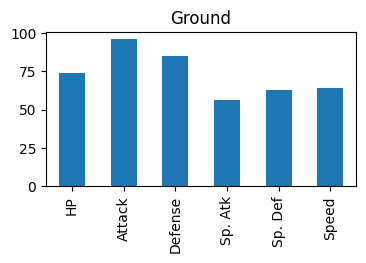

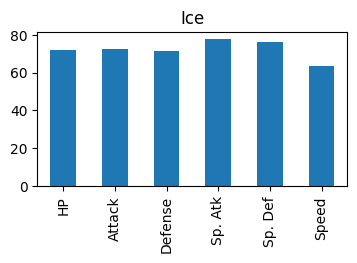

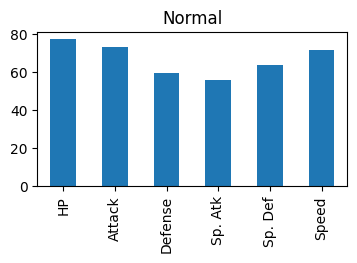

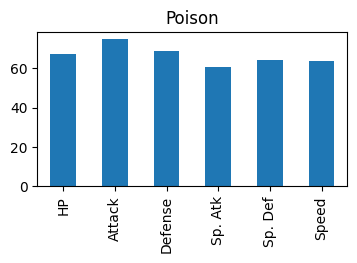

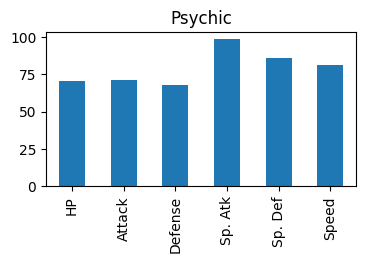

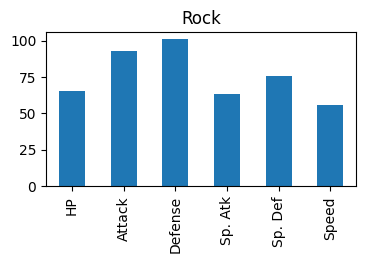

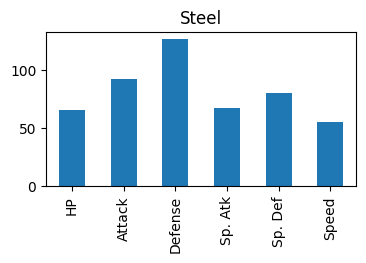

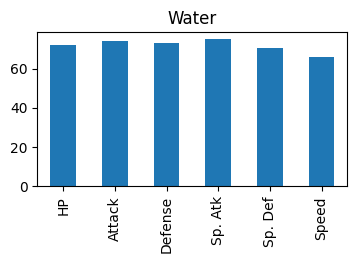

In [ ]:
columns = pokemon_df['Type 1'].value_counts().index
index = df.index


for ind in index:
  plt.figure(figsize=(4,2))
  df.loc[ind].plot(
      x=col,
      y=df,
      kind='bar'
  )
  plt.title(ind)
  plt.show()

In [ ]:
replacement_df = pokemon_df.groupby(by='Type 1')['Type 2'].agg(pd.Series.mode)
replacement_df

Type 1
Bug                  Flying
Dark                 Flying
Dragon               Flying
Electric             Flying
Fairy                Flying
Fighting            Psychic
Fire               Fighting
Flying               Dragon
Ghost                 Grass
Grass                Poison
Ground               Flying
Ice         [Ground, Water]
Normal               Flying
Poison       [Dark, Flying]
Psychic     [Fairy, Flying]
Rock        [Ground, Water]
Steel               Psychic
Water                Ground
Name: Type 2, dtype: object

In [ ]:
for i, x in replacement_df.iteritems():
  if not isinstance(x, str):
    replacement_df[i] = x[1]

<ipython-input-19-668cec6e90ff>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, x in replacement_df.iteritems():


In [ ]:
replacement_df.tail()

Type 1
Poison      Flying
Psychic     Flying
Rock         Water
Steel      Psychic
Water       Ground
Name: Type 2, dtype: object

In [ ]:
null_t2 = pokemon_df[pokemon_df['Type 2'].isnull()]
null_t2

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


In [ ]:
for i in null_t2["#"]:
  pokemon_df.loc[pokemon_df['#'] == i, 'Type 2'] = replacement_df[null_t2.loc[pokemon_df['#'] == i,'Type 1']].values

In [ ]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           799 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      799 non-null    object
 3   Type 2      799 non-null    object
 4   HP          799 non-null    int64 
 5   Attack      799 non-null    int64 
 6   Defense     799 non-null    int64 
 7   Sp. Atk     799 non-null    int64 
 8   Sp. Def     799 non-null    int64 
 9   Speed       799 non-null    int64 
 10  Generation  799 non-null    int64 
 11  Legendary   799 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 108.0+ KB


<a name ='4'></a>
#4. Outlier detection

In [ ]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,Fighting,39,52,43,60,50,65,1,False


In [ ]:
def find_outliers(columns, dataset = pokemon_df):
  outliers = []
  for col in columns:
    col_series = dataset[col].sort_values()

    Q2 = col_series.median()
    mid_data = round(len(col_series)/2)
    Q1, Q3 = col_series[:mid_data].median(), col_series[mid_data:].median()
    IQR = Q3 - Q1
    data_max, data_min = Q3 + IQR *1.5, Q1 - IQR * 1.5

    for i, value in col_series.iteritems():
      if value > data_max or value < data_min:
        outliers.append([col, value, i])

  return pd.pivot_table(pd.DataFrame(outliers, columns=['columns', 'outlier', 'index']), index=['columns', 'outlier', 'index'])


In [ ]:
find_outliers(numerical_cols)

<ipython-input-25-afeabd0b11f1>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in col_series.iteritems():
<ipython-input-25-afeabd0b11f1>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in col_series.iteritems():
<ipython-input-25-afeabd0b11f1>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in col_series.iteritems():
<ipython-input-25-afeabd0b11f1>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in col_series.iteritems():
<ipython-input-25-afeabd0b11f1>:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, value in col_series.iteritems():
<ipython-input-25-afeabd0b11f1>:12: FutureWarning: iteritems is deprecated and will be removed in a future ver

Empty DataFrame
Columns: []
Index: [(Attack, 170, 494), (Attack, 170, 711), (Attack, 180, 424), (Attack, 180, 426), (Attack, 180, 429), (Attack, 185, 232), (Attack, 190, 163), (Defense, 160, 103), (Defense, 160, 424), (Defense, 160, 430), (Defense, 168, 456), (Defense, 180, 87), (Defense, 180, 98), (Defense, 180, 332), (Defense, 184, 789), (Defense, 200, 223), (Defense, 200, 414), (Defense, 230, 224), (Defense, 230, 230), (Defense, 230, 333), (HP, 1, 316), (HP, 126, 792), (HP, 126, 793), (HP, 130, 142), (HP, 130, 145), (HP, 130, 350), (HP, 135, 495), (HP, 140, 45), (HP, 144, 321), (HP, 150, 313), (HP, 150, 473), (HP, 150, 544), (HP, 150, 545), (HP, 160, 155), (HP, 165, 655), (HP, 170, 351), (HP, 190, 217), (HP, 250, 121), (HP, 255, 261), (Sp. Atk, 165, 196), (Sp. Atk, 165, 306), (Sp. Atk, 170, 102), (Sp. Atk, 170, 712), (Sp. Atk, 170, 798), (Sp. Atk, 175, 71), (Sp. Atk, 180, 422), (Sp. Atk, 180, 426), (Sp. Atk, 180, 429), (Sp. Atk, 194, 164), (Sp. Def, 154, 269), (Sp. Def, 154, 270), (Sp. Def, 154, 739), (Sp. Def, 160, 422), (Sp. Def, 160, 430), (Sp. Def, 200, 415), (Sp. Def, 230, 230), (Speed, 160, 315), (Speed, 180, 431)]

In [ ]:
pokemon_df.loc[[316]] # HP 1

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,317,Shedinja,Bug,Ghost,1,90,45,30,30,40,3,False


<a name='5'></a>
#5. Visualization

In [ ]:
pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,Fighting,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [ ]:
type_rel_df = pd.DataFrame(pokemon_df.groupby(['Type 1', 'Type 2']).size())
type_rel_df.reset_index(inplace=True)
type_rel_df.head()

,Type 1,Type 2,0
0,Bug,Electric,2
1,Bug,Fighting,2
2,Bug,Fire,2
3,Bug,Flying,31
4,Bug,Ghost,1


In [ ]:
# sns.catplot(type_rel_df, x=type_rel_df['Type 1'], y=type_rel_df[0], kind='bar', hue='Type 2', aspect=3)

In [ ]:
type_rel_df[type_rel_df['Type 1'] == 'Flying']

,Type 1,Type 2,0
50,Flying,Dragon,4


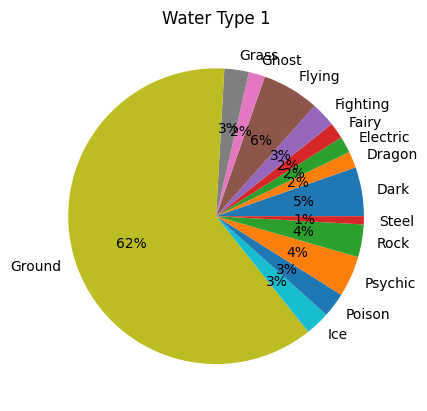

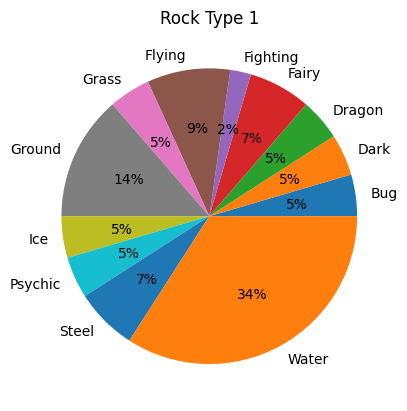

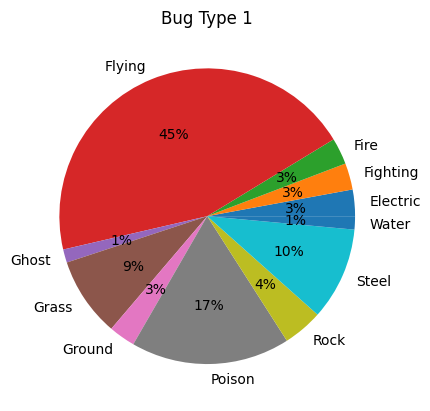

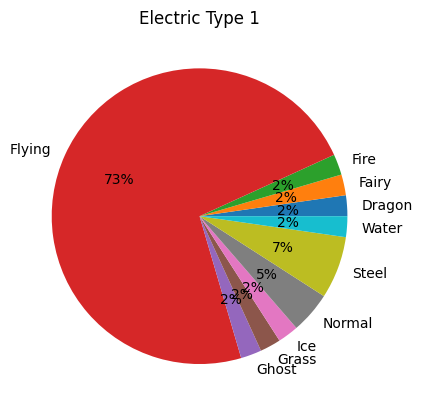

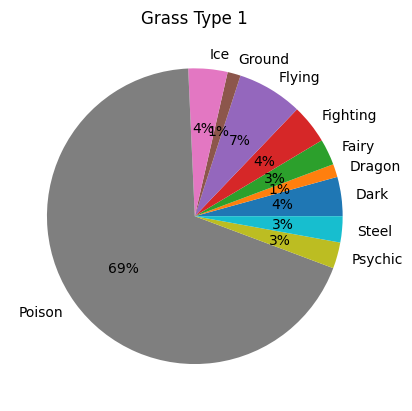

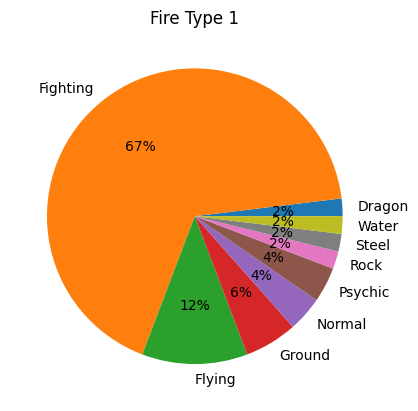

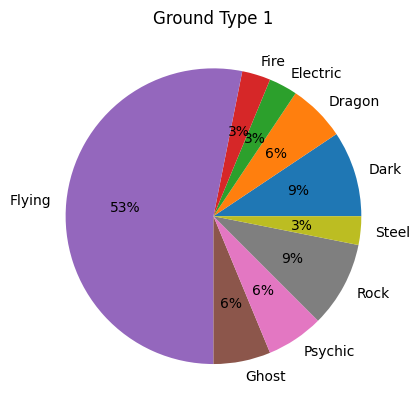

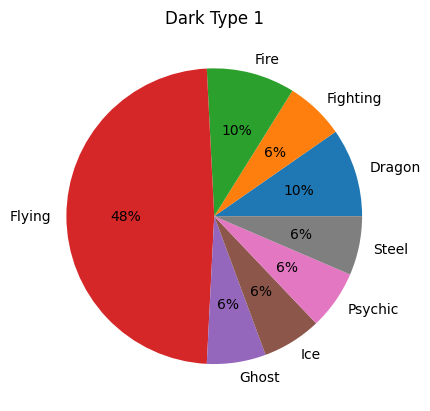

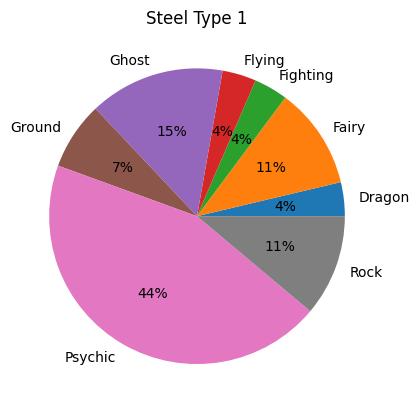

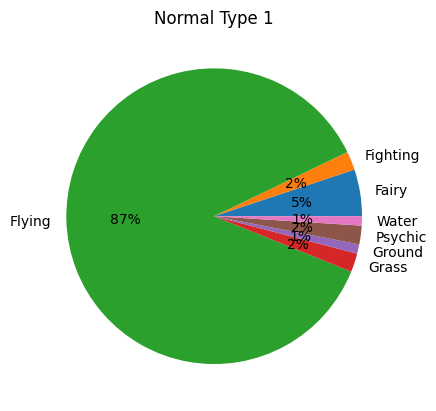

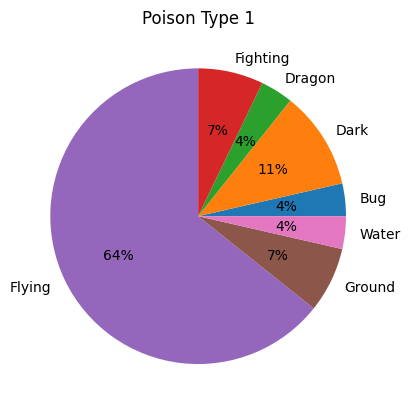

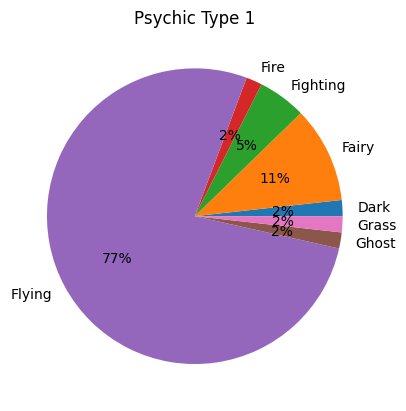

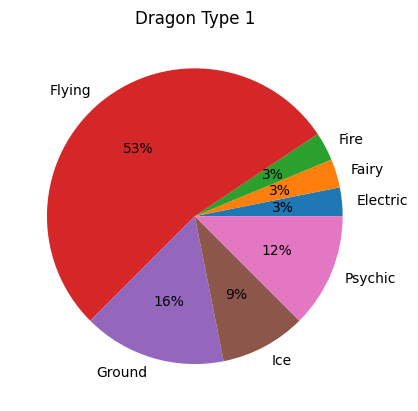

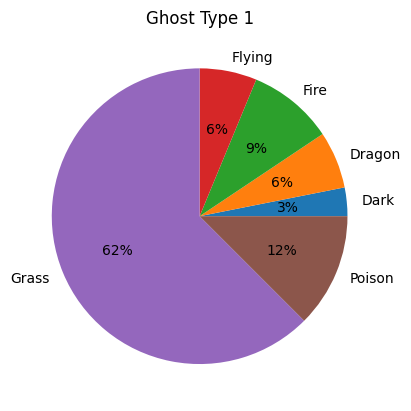

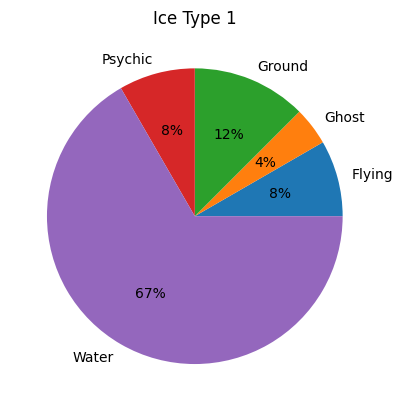

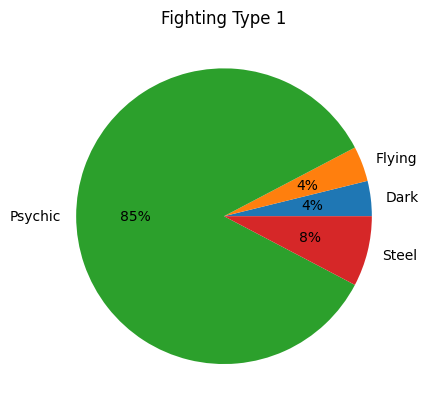

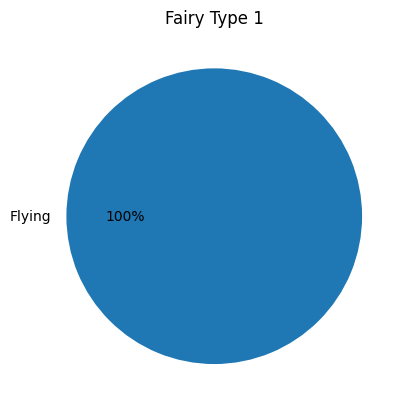

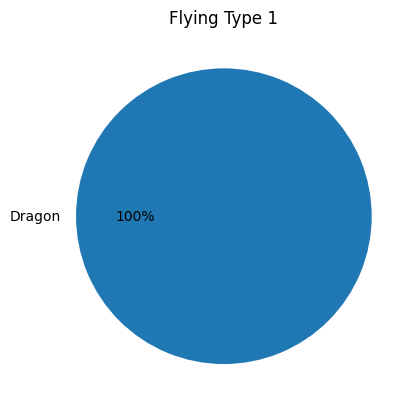

In [ ]:
# popular type 2s among type 1s
for type1 in type_rel_df['Type 1'].value_counts().index:
  plt.pie(type_rel_df[0][type_rel_df['Type 1'] == type1],labels=type_rel_df['Type 2'][type_rel_df['Type 1'] == type1], autopct='%1.0f%%')

  plt.title(f"{type1} Type 1")
  plt.show()

In [ ]:
type1_rel_df = pd.DataFrame(pokemon_df.groupby(['Generation','Type 1']).size())
type1_rel_df.reset_index(inplace=True)
type2_rel_df = pd.DataFrame(pokemon_df.groupby(['Generation','Type 2']).size())
type2_rel_df.reset_index(inplace=True)
type1_rel_df.head()

,Generation,Type 1,0
0,1,Bug,14
1,1,Dragon,3
2,1,Electric,9
3,1,Fairy,2
4,1,Fighting,6


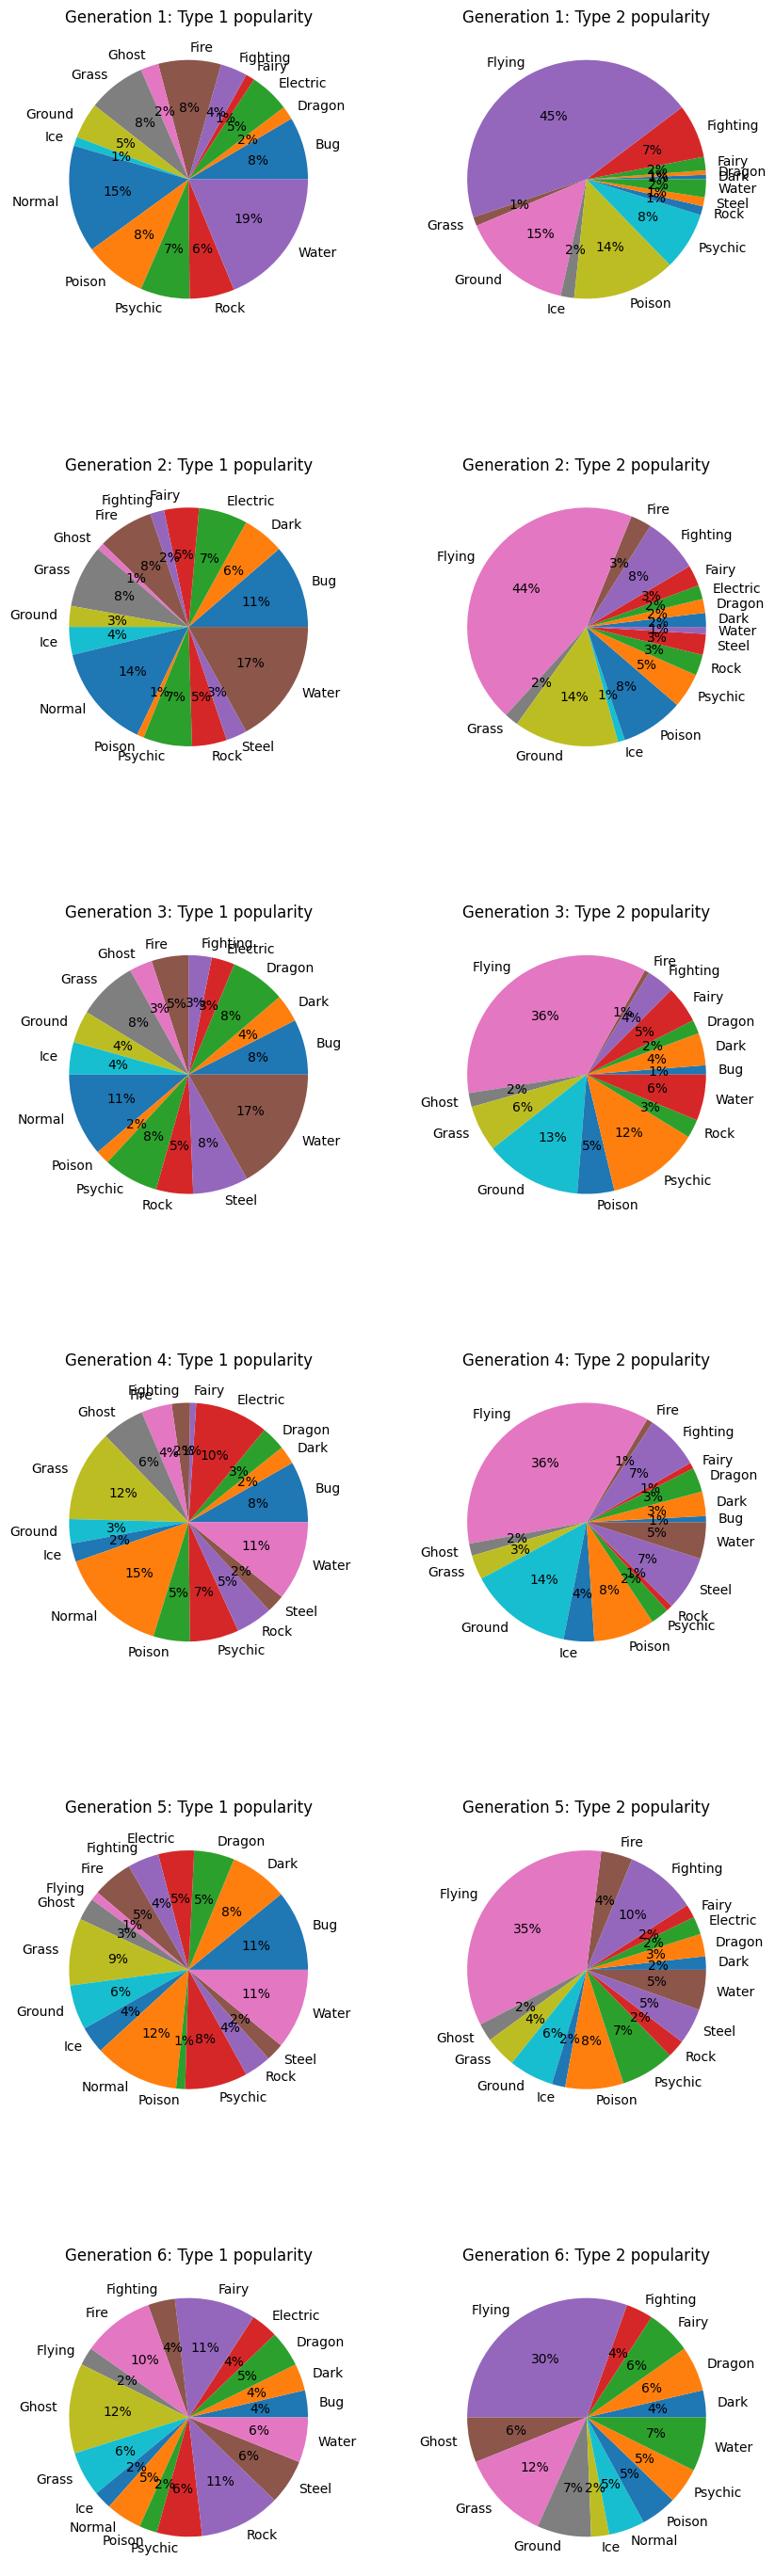

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [ ]:
# each generation's popular type 1/ type 2s
nrows=type1_rel_df['Generation'].value_counts().index
fig, ax = plt.subplots(nrows=len(nrows),ncols=2, figsize=(10,35))
for row in range(0,len(nrows)):
  plt.figure(figsize=(3,3))
  # ax.set_ti
  ax[row, 0].set_title(f'Generation {row+1}: Type 1 popularity')
  ax[row, 0].pie(type1_rel_df[0][type1_rel_df['Generation'] == row+1],labels=type1_rel_df['Type 1'][type1_rel_df['Generation'] == row+1], autopct='%1.0f%%')
  ax[row, 1].set_title(f'Generation {row+1}: Type 2 popularity')
  ax[row, 1].pie(type2_rel_df[0][type2_rel_df['Generation'] == row+1],labels=type2_rel_df['Type 2'][type2_rel_df['Generation'] == row+1], autopct='%1.0f%%')

plt.tight_layout()

fig.subplots_adjust(hspace=0.5)

In [ ]:
type1_rel_df = pd.DataFrame(pokemon_df[pokemon_df['Legendary'] == True].groupby(['Type 1']).size())
type1_rel_df.reset_index(inplace=True)
type1_rel_df.sort_values(0, ascending=False,inplace=True)
type1_rel_df = type1_rel_df.head(7)
type2_rel_df = pd.DataFrame(pokemon_df[pokemon_df['Legendary'] == True].groupby(['Type 2']).size())
type2_rel_df.reset_index(inplace=True)
type2_rel_df.sort_values(0, ascending=False,inplace=True)
type2_rel_df = type2_rel_df.head(7)
type1_rel_df.head()

,Type 1,0
11,Psychic,14
1,Dragon,12
4,Fire,5
2,Electric,4
8,Ground,4


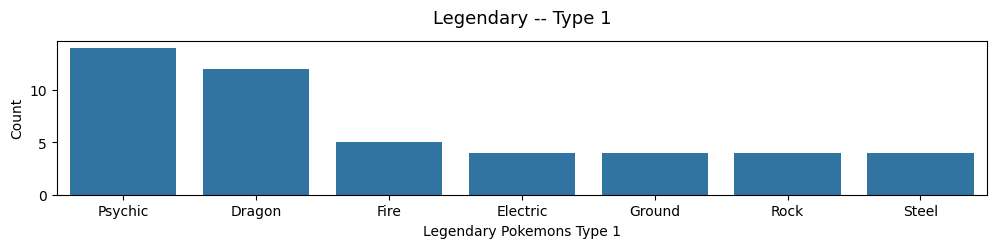

In [ ]:
# most common type 1s among legendaries
plt.figure(figsize=(12,2))
sns.barplot(type1_rel_df, y=type1_rel_df[0], x='Type 1');
plt.title('Legendary -- Type 1', y=1.06, fontsize = 13)
plt.xlabel('Legendary Pokemons Type 1')
plt.ylabel('Count')
plt.show()

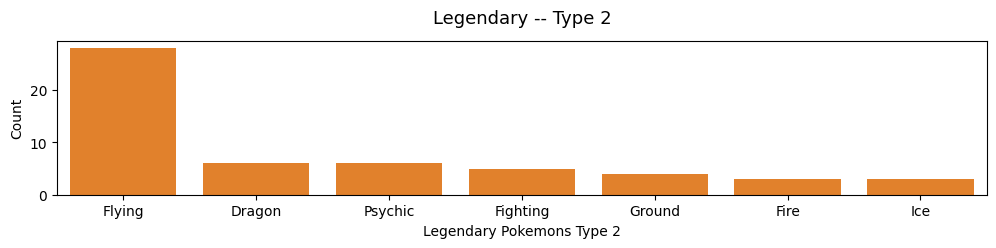

In [ ]:
plt.figure(figsize=(12,2))
plt.bar(type2_rel_df['Type 2'], type2_rel_df[0])
sns.barplot(type2_rel_df, y=type2_rel_df[0], x='Type 2');
plt.title('Legendary -- Type 2', y=1.06, fontsize = 13)
plt.xlabel('Legendary Pokemons Type 2')
plt.ylabel('Count')
plt.show()

In [ ]:
# boxplots of numerical specialities of each generations
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,Fighting,39,52,43,60,50,65,1,False


In [ ]:
gen_spec_df = pokemon_df.groupby("Generation")[numerical_cols].median()
gen_spec_df = gen_spec_df.reset_index().melt(id_vars='Generation', var_name='Stats', value_name='Value')

In [ ]:
gen_spec_df.head()

,Generation,Stats,Value
0,1,HP,61.0
1,2,HP,70.0
2,3,HP,65.0
3,4,HP,70.0
4,5,HP,70.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


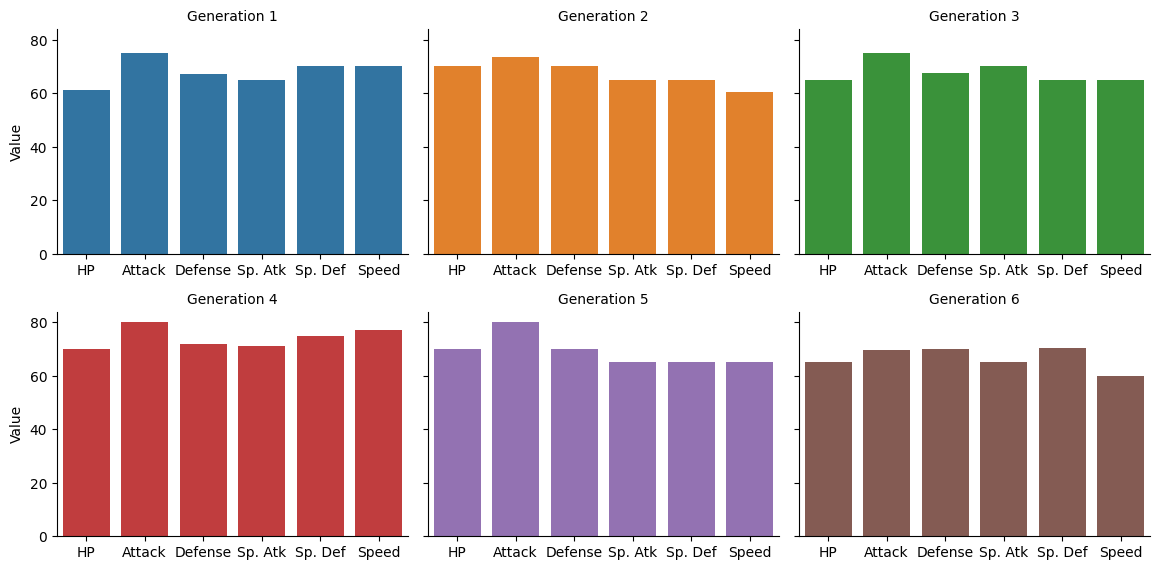

In [ ]:
# Plot
g = sns.FacetGrid(gen_spec_df, col="Generation", col_wrap=3, hue="Generation", aspect=1.3, sharex=False)
g.map(sns.barplot, "Stats", "Value")
g.set_titles("Generation {col_name}")
g.set_axis_labels("", "Value")
plt.show()


In [ ]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,Fighting,39,52,43,60,50,65,1,False


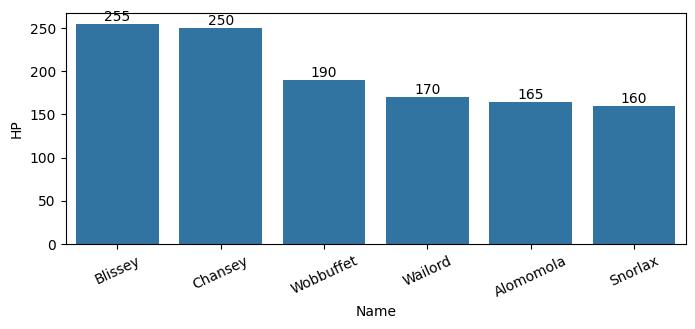

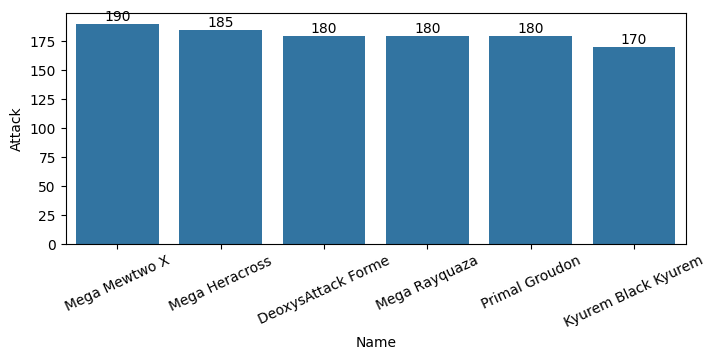

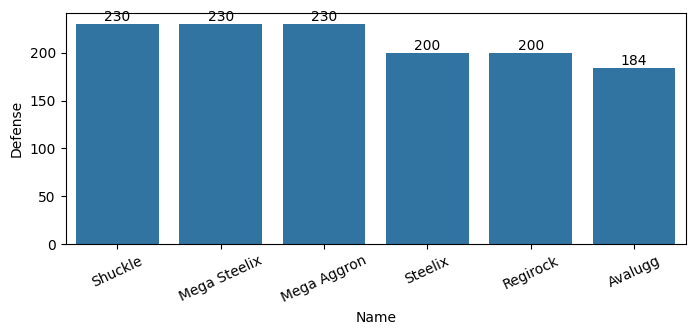

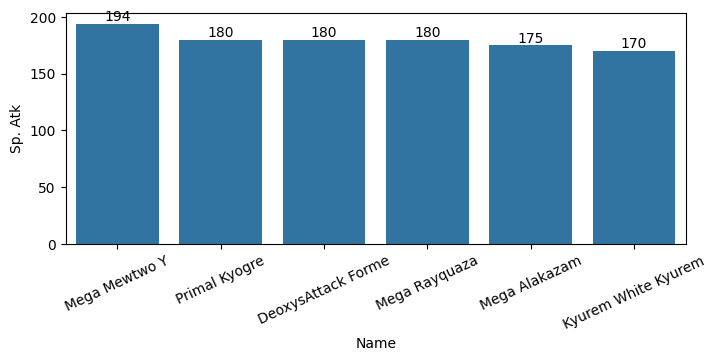

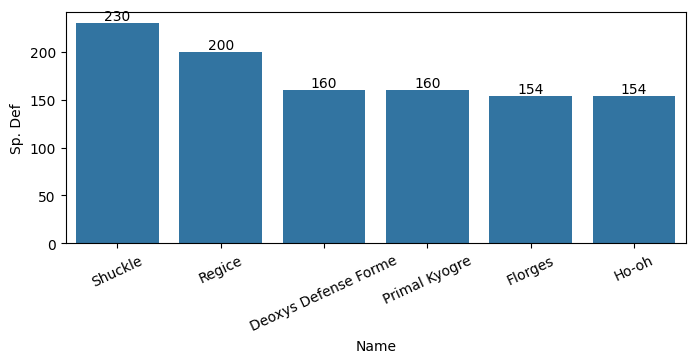

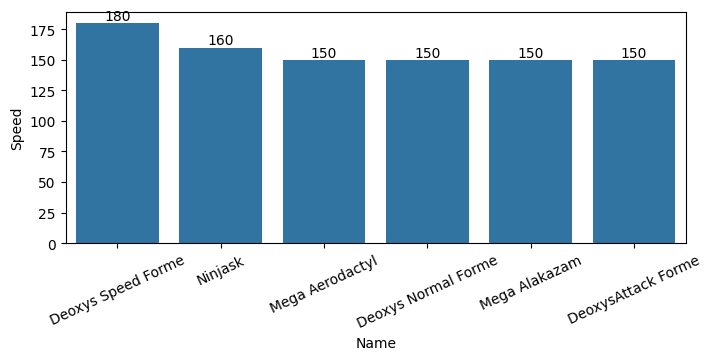

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(8,3))
  df = pokemon_df.sort_values(by=col, ascending=False).head(6)
  g = sns.barplot(df, x='Name', y=col)
  g.bar_label(g.containers[0])
  plt.xticks(rotation=25)
  plt.show()

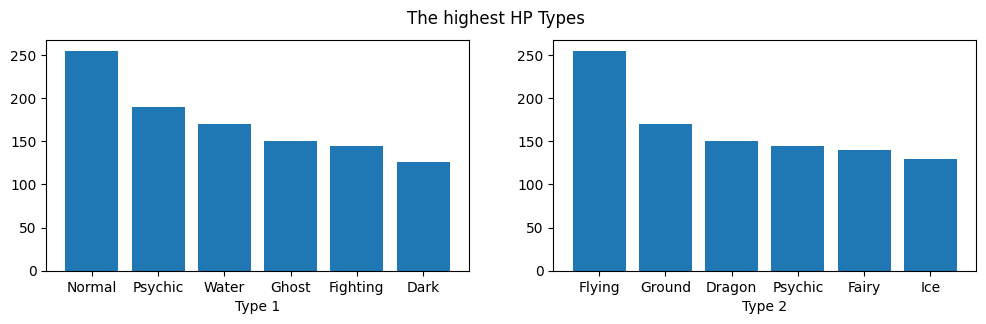

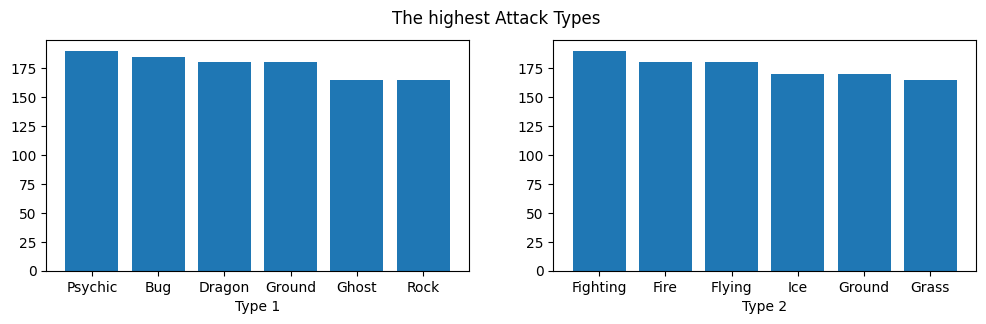

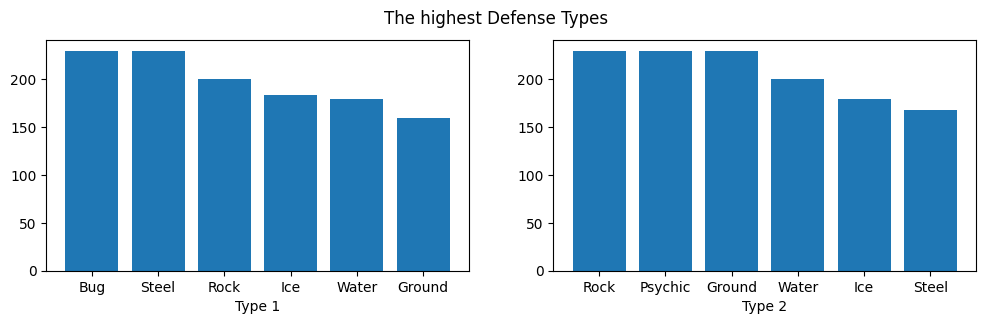

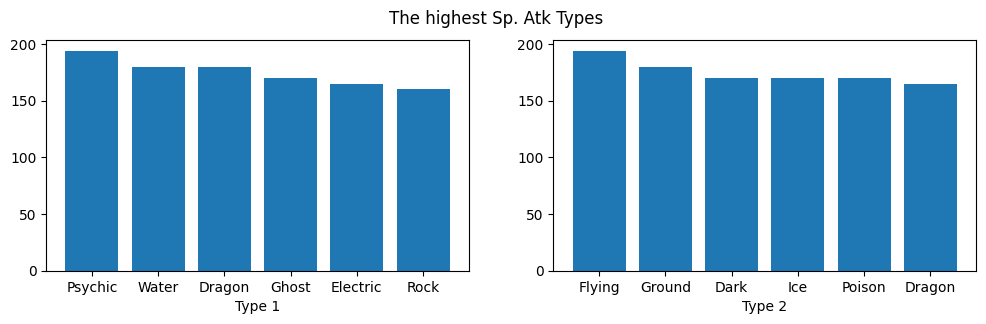

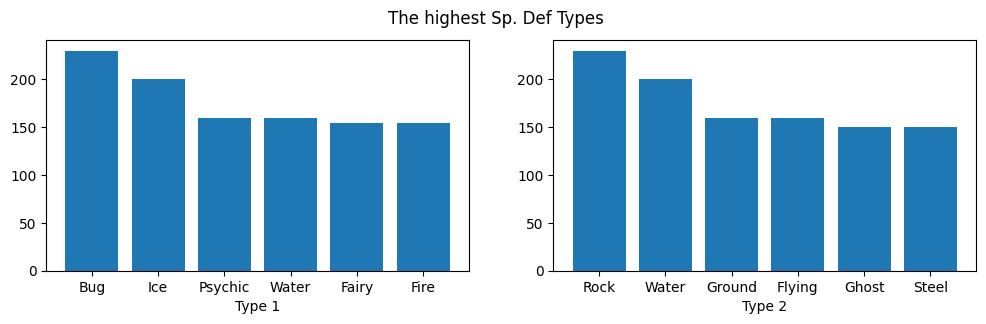

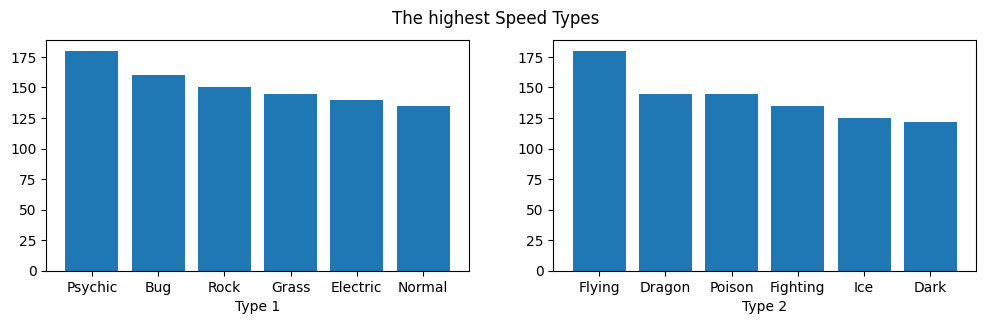

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(12,3))
  type1_sorted = pokemon_df.groupby(['Type 1'])[col].max().sort_values(ascending=False).reset_index().head(6)
  type2_sorted = pokemon_df.groupby(['Type 2'])[col].max().sort_values(ascending=False).reset_index().head(6)
  plt.suptitle(f"The highest {col} Types")
  plt.subplot(1, 2, 1)
  plt.bar(type1_sorted['Type 1'], type1_sorted[col])
  plt.xlabel("Type 1")
  plt.subplot(1, 2, 2)
  plt.bar(type2_sorted['Type 2'], type2_sorted[col])
  plt.xlabel("Type 2")


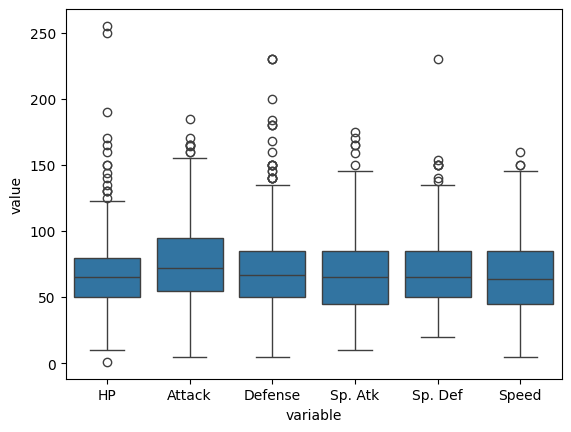

<Axes: xlabel='variable', ylabel='value'>

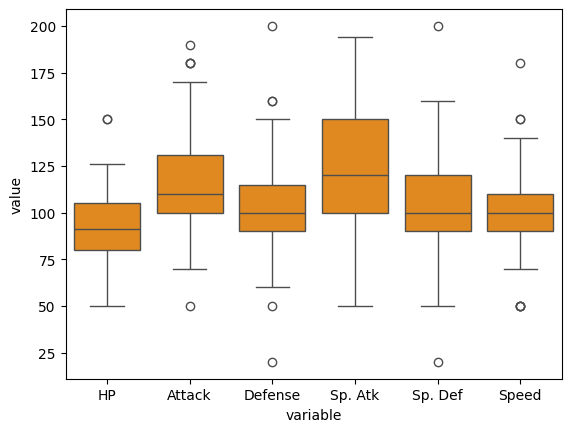

In [ ]:
F_legendary = pokemon_df[pokemon_df['Legendary'] == False][numerical_cols].melt()
sns.boxplot(F_legendary, x='variable', y='value')
plt.show()
T_legendary = pokemon_df[pokemon_df['Legendary'] == True][numerical_cols].melt()
sns.boxplot(T_legendary, x='variable', y='value', color='darkorange')

In [ ]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,Fighting,39,52,43,60,50,65,1,False


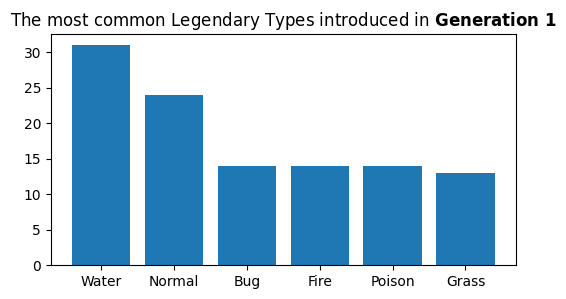

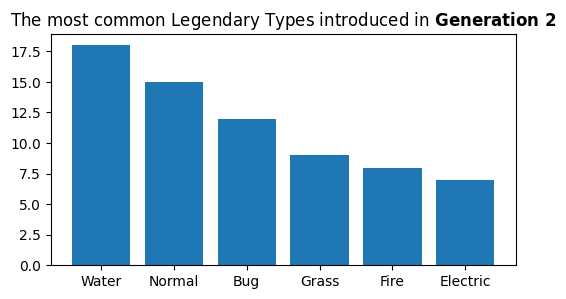

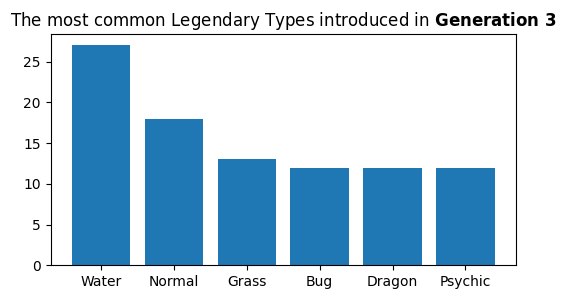

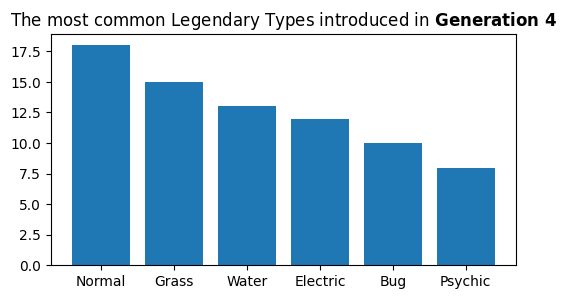

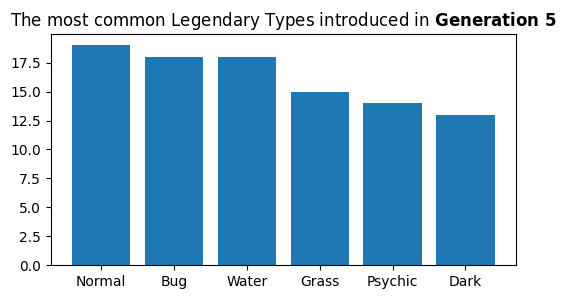

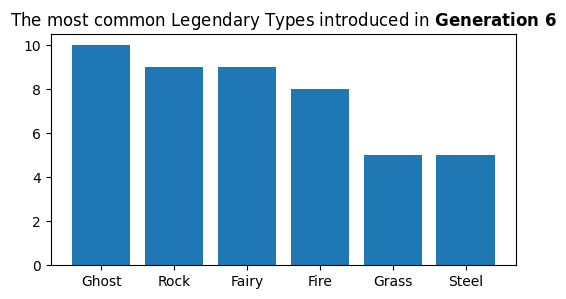

In [ ]:
count_leg_df = pokemon_df.groupby(['Generation', 'Type 1'])['Legendary'].count().reset_index()
for i in range(1, len(count_leg_df['Generation'].unique())+1):
  plt.figure(figsize=(6,3))
  df = count_leg_df[count_leg_df['Generation'] == i].sort_values(by='Legendary', ascending=False).head(6)
  plt.bar(df['Type 1'], df['Legendary'])
  plt.title('The most common Legendary Types introduced in ' + r"$\bf{Generation\ }$" + r"$\bf{" + str(i) + "}$")
  plt.show()

In [ ]:
pokemon_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,Fighting,39,52,43,60,50,65,1,False


In [ ]:
data = {}
for col in numerical_cols:
  data[str(col)] = pokemon_df[numerical_cols].sort_values(by=col, ascending=False).head(10).sum()


In [ ]:
for i, spec in data.items():
  print(i)

HP
Attack
Defense
Sp. Atk
Sp. Def
Speed


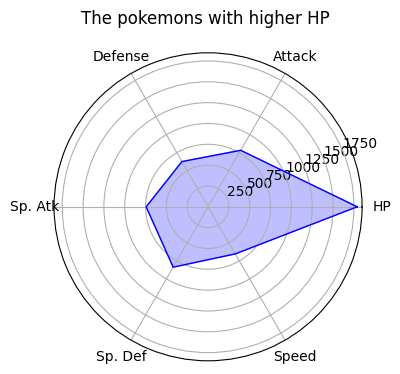

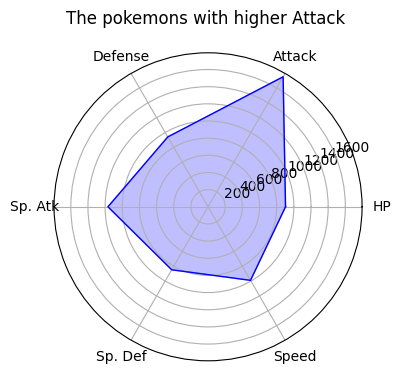

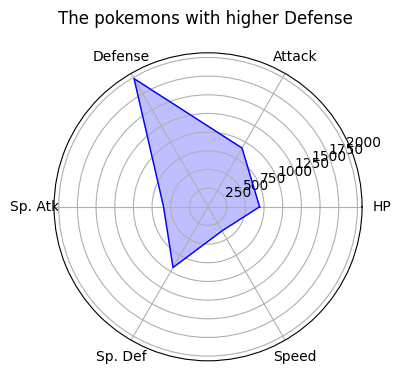

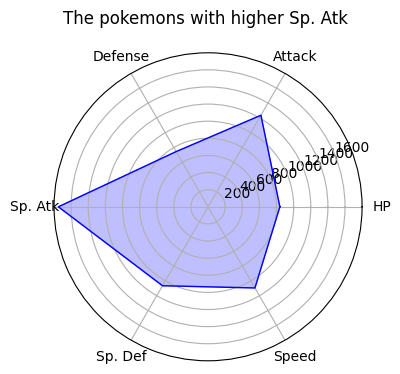

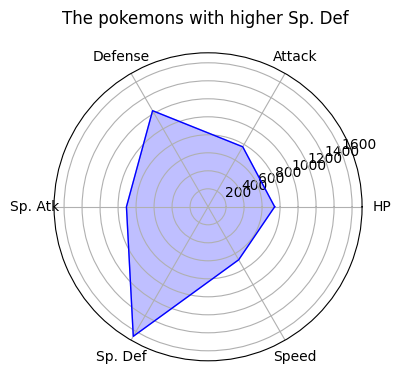

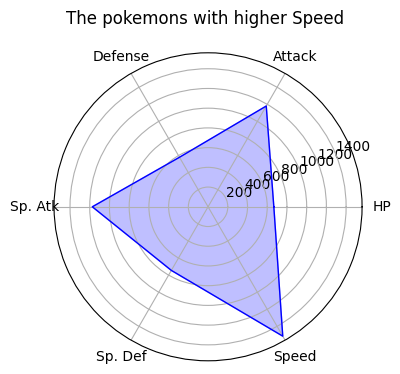

In [ ]:
for i, spec in data.items():
  # Define labels and values
  numerical_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
  values = spec.to_list()

  # Number of variables we're plotting.
  num_vars = len(numerical_cols)

  # Split the circle into even parts and save the angles
  # so we know where to put each axis.
  angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

  # The plot is a circle, so we need to "complete the loop"
  # and append the start value to the end.
  values += values[:1]
  angles += angles[:1]

  # Create polar plot
  fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(4,4))
  # Draw the outline of our data.
  ax.plot(angles, values, color='blue', linewidth=1)

  # Fill it in.
  ax.fill(angles, values, color='blue', alpha=0.25)

  # Set labels
  ax.set_xticks(angles[:-1])
  ax.set_xticklabels(numerical_cols)
  plt.title(f"The pokemons with higher {i} \n")
  plt.show()

